In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import plotly.express as px

# 1. Математическая статистика. Начало

Источник: http://www.mathprofi.ru/matematicheskaya_statistika.html

Пример №3: 

а) Урожайность картофеля по трём областям за **** год составила 147, 145, 155 ц/га (центнеров с га). Требуется вычислить среднюю урожайность.

    Метрическая справка: 
    - 1 центнер =  100 кг, 1 тонна = 1000 кг;
    - 1 гектар (га) = 10000 квадратных метров;
        показатель ц/га обозначает, сколько центнеров собрано с 1 гектара.
        Не забываем приписывать к итоговому результату размерность! (секунды, граммы и т.д., а в данном случае – ц/га).


б) Известны следующие данные по трём областям:
|Область|Общая посевная площадь. тыс.га|Урожайность, ц/га|
|------------|-----------|----------|
|А|139,80|147|
|Б|102,34|145|
|В|63,29|155|

Требуется вычислить среднюю урожайность.

    Обратите внимание, что здесь урожайность, скажем, по 3-й области велика, но её посевная площадь мала. Поэтому урожайность уместно «взвесить» по площадям.


в) вычислить среднюю урожайность по следующим данным:
|Область|Валовой сбор картофеля, тыс.тонн|Урожайность, ц/га|
|------------|-----------|----------|
|А|2055|147|
|Б|1484|145|
|В|981|155|

    «Валовой» – это значит, всего собрано по области.



In [20]:
exs1 = np.array([147, 145, 155])
print("Средняя урожайность: ", exs1.sum() / len(exs1), " ц/га по трём областям")

Средняя урожайность:  149.0  ц/га по трём областям


In [21]:
exs2 = pd.DataFrame({'Область': ['А', 'Б', 'В'], 'Общая посевная площадь. тыс.га': [139.8, 102.34, 63.29], 'Урожайность, ц/га': [147, 145, 155]})
print("Средневзвешенная урожайность (распределенная по посевным площадям): ",
    (exs2.iloc[:, 1] * exs2.iloc[:, 2]).sum() / exs2.iloc[:, 1].sum(), ' ц/га по трем областям')

Средневзвешенная урожайность (распределенная по посевным площадям):  147.98759126477427  ц/га по трем областям


In [23]:
exs3 = pd.DataFrame({'Область': ['А', 'Б', 'В'], 'Валовой сбор картофеля, тыс.тонн': [2055, 1484, 981], 'Урожайность, ц/га': [147, 145, 155]})
print("Посевная площадь = Валовой сбор / Урожайность. По сути высчитывается гармоническое среднее\n",
      "Средняя гармоническая урожайность: ",
     exs3.iloc[:, 1].sum() / (exs3.iloc[:, 1] / exs3.iloc[:, 2]).sum(), ' ц/га по трем областям')

Посевная площадь = Валовой сбор / Урожайность. По сути высчитывается гармоническое среднее
 Средняя гармоническая урожайность:  147.98756464730428  ц/га по трем областям


# 2. Дискретный вариационный ряд. Полигон частот и эмпирическая функция распределения

По результатам выборочного исследования рабочих цеха были установлены их квалификационные разряды: 4, 5, 6, 4, 4, 2, 3, 5, 4, 4, 5, 2, 3, 3, 4, 5, 5, 2, 3, 6, 5, 4, 6, 4, 3. 

Требуется:
* составить вариационный ряд и построить полигон частот;
* найти относительные частоты и построить эмпирическую функцию распределения.

In [33]:
workers = pd.DataFrame({'order': [4, 5, 6, 4, 4, 2, 3, 5, 4, 4, 5, 2, 3, 3, 4, 5, 5, 2, 3, 6, 5, 4, 6, 4, 3]})
variational_series = workers.value_counts().reset_index().sort_values('order')
variational_series.rename(columns={'count':'frequency'}, inplace=True)
variational_series

,order,frequency
3,2,3
2,3,5
0,4,8
1,5,6
4,6,3


Полигон частот:


<Axes: xlabel='order', ylabel='frequency'>

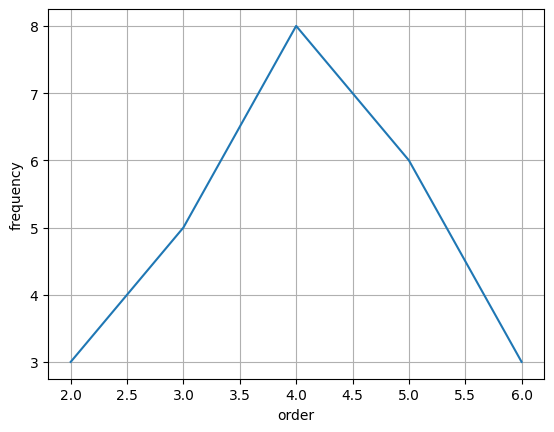

In [58]:
print('Полигон частот:')
plt.grid()
sns.lineplot(variational_series, x='order', y='frequency')

In [65]:
variational_series['relative_frequencies']  = variational_series.loc[:,'frequency'] / variational_series.loc[:,'frequency'].sum()
variational_series['accumulated_frequencies'] = variational_series['relative_frequencies'].cumsum()
variational_series

,order,frequency,relative_frequencies,accumulated_frequencies
3,2,3,0.12,0.12
2,3,5,0.20,0.32
0,4,8,0.32,0.64
1,5,6,0.24,0.88
4,6,3,0.12,1.00


Эмпирическая функция распределения:


<Axes: xlabel='order', ylabel='Proportion'>

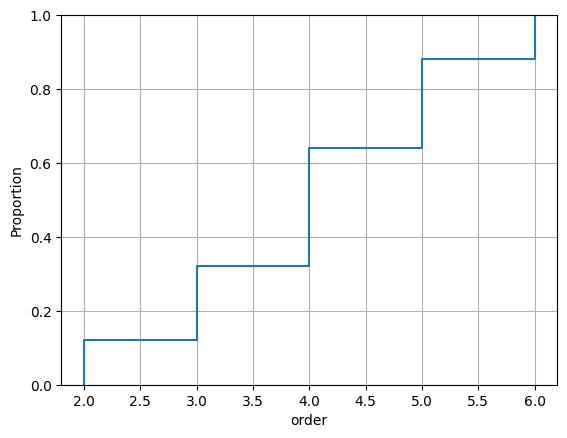

In [63]:
# По сути, рассчитанные относительные и накопленные частоты не нужны, если используется seaborn.ecdfplot
plt.grid()
print('Эмпирическая функция распределения:')
sns.ecdfplot(workers, x='order')

## ДЗ: Дано статистическое распределение выборки:
| x_l | -2 | 1,5|5|7|
|----|----|----|--|-|
|n_l | 12 | 8  | 20|10|

Составить эмпирическую функцию распределения, выполнить чертёж

In [64]:
hw = pd.DataFrame({'x_l': [-2, 1.5, 5, 7], 'n_l': [12, 8, 20, 10]})
hw

,x_l,n_l
0,-2.0,12
1,1.5,8
2,5.0,20
3,7.0,10


In [66]:
# Просто для сверки с ответами
hw['relative_frequencies']  = hw.loc[:,'n_l'] / hw.loc[:,'n_l'].sum()
hw['accumulated_frequencies'] = hw['relative_frequencies'].cumsum()
hw

,x_l,n_l,relative_frequencies,accumulated_frequencies
0,-2.0,12,0.24,0.24
1,1.5,8,0.16,0.40
2,5.0,20,0.40,0.80
3,7.0,10,0.20,1.00


Эмпирическая функция распределения:


<Axes: xlabel='x_l', ylabel='Proportion'>

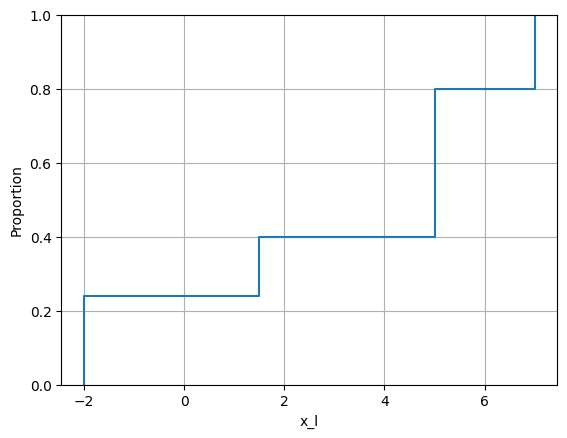

In [75]:
# Восстанавливаем исходную серию
hw_raw = hw.loc[:, 'x_l'].repeat(hw.loc[:, 'n_l'])

plt.grid()
print('Эмпирическая функция распределения:')
sns.ecdfplot(hw_raw)

# 3. Интервальный вариационный ряд. Гистограмма относительных частот

Пример 6

По результатам исследования цены некоторого товара в различных торговых точках города, получены следующие данные (в некоторых денежных единицах):

[7.5, 7.6, 8.7, 6.1, 10.6, 9.8, 7, 6, 8.3, 6, 8.2, 8.5, 7.4, 7.1, 9.5, 6.8, 9.6, 6.3, 6.3, 8.5, 5.8, 7.5, 9.2, 7.2, 7, 8, 7.5, 7.5, 8, 6.5]

Требуется составить вариационный ряд распределения, построить гистограмму частот, гистограмму и полигон относительных частот + бонус – эмпирическую функцию распределения.

In [175]:
exs6 = pd.Series([7.5, 7.6, 8.7, 6.1, 10.6, 9.8, 7, 6, 8.3, 6, 8.2, 8.5, 7.4, 7.1, 9.5, 6.8, 9.6, 6.3, 6.3, 8.5, 5.8, 7.5, 9.2, 7.2, 7, 8, 7.5, 7.5, 8, 6.5])
n = len(exs6)
print("Размер выборки: ", n)
exs6.value_counts()

Размер выборки:  30


7.5     4
8.0     2
7.0     2
6.0     2
6.3     2
8.5     2
9.5     1
7.2     1
9.2     1
5.8     1
9.6     1
6.8     1
7.4     1
7.1     1
7.6     1
8.2     1
8.3     1
9.8     1
10.6    1
6.1     1
8.7     1
6.5     1
Name: count, dtype: int64

Вычислим количество интервалов по формуле Стерджеса => $k = 1 + 3.322 \lg{n}$ 

In [176]:
k = (1 + 3.322 * math.log10(n)).__floor__()
print('Количество интервалов: ', k)
R = exs6.max() - exs6.min()
print("Размах вариации: ", R)
h = R / k
print("Длины частот: ", h)

Количество интервалов:  5
Размах вариации:  4.8
Длины частот:  0.96


In [178]:
int_var_s = pd.cut(exs6, k).astype('str').value_counts().sort_index().reset_index()
int_var_s.rename(columns={'index': 'интервалы', 'count': 'n_i'}, inplace=True)
int_var_s['x_i'] = int_var_s.iloc[:, 0].str.extract('\((\d\.?\d*), (\d\.?\d*)\[?\(?', expand=True).astype('float').mean(axis=1)
int_var_s['плотность частот'] = int_var_s.loc[:, 'n_i'] / h 
int_var_s['относительные частоты'] = int_var_s.loc[:, 'n_i'] / n
int_var_s['плотность относительных частот'] = int_var_s.loc[:, 'относительные частоты'] / h 
int_var_s

,интервалы,n_i,x_i,плотность частот,относительные частоты,плотность относительных частот
0,"(5.795, 6.76]",7,6.2775,7.291667,0.233333,0.243056
1,"(6.76, 7.72]",11,7.2400,11.458333,0.366667,0.381944
2,"(7.72, 8.68]",6,8.2000,6.250000,0.200000,0.208333
3,"(8.68, 9.64]",4,9.1600,4.166667,0.133333,0.138889
4,"(9.64, 10.6]",2,9.8200,2.083333,0.066667,0.069444


In [194]:
px.histogram(exs6, nbins=5, width=800)

<Axes: ylabel='Count'>

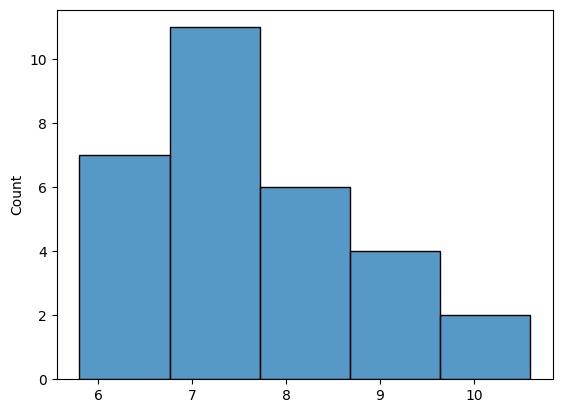

In [186]:
sns.histplot(exs6, bins=5)